#第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい

##準備

In [ ]:
!pwd
%cd /content/drive/My Drive/Colab Notebooks/NLP/

/content
/content/drive/My Drive/Colab Notebooks/NLP


データをダウンロードします。

In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2021-10-03 06:59:11--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2021-10-03 06:59:11 (18.0 MB/s) - ‘neko.txt.1’ saved [975789/975789]



形態素解析エンジンMecabをVMにInstallします。

In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

コマンドラインで、形態素解析します。

In [ ]:
!mecab -o ./neko.txt.mecab ./neko.txt

中身を確認

In [ ]:
!head -n 50 ./neko.txt.mecab 

###MeCabを動かしてみる

Pythonの中でMecabを使えるようにします。unidic-liteという一番コンパクトな辞書をinstallしておきます。

In [ ]:
!pip install mecab-python3
!pip install unidic-lite

MecabのAPIは、デフォルトで付加情報を出します。-O wakatiとすると、語分ちだけを返します。
実行してみましょう。

In [ ]:
import MeCab
tagger = MeCab.Tagger("-Owakati") 
print('分かち:',tagger.parse('吾輩は猫である。'))
tagger = MeCab.Tagger() 
print('解析:\n',tagger.parse('吾輩は猫である。'))

##課題30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．



###ヒント

マッピング型とは、辞書型のこと。
https://note.nkmk.me/python-dict-create/　

surfaceというのは、活用語の場合、単語の活用形で、baseは、終止形。

形態素解析した結果は、以下のようなフォーマットをしている。表層形の後ろはtab。


```
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
```
文の切れ目は、EOS (EndOdSentence)のみ含む行。

期待する出力は、ある1文だけで、以下のようなもの
```
{‘surface’:’xxx’, ‘base’:‘yyy’, ‘pos’:‘zzz’, ‘pos1’:‘aaa’}
{‘surface’:…. … }
…
```


###解答例

In [ ]:
sentences = []
morphs = []
with open( './neko.txt.mecab', mode='r') as f:
  for line in f:  
    if line == 'EOS\n':
      sentences.append(morphs) #morphsを1文分として保存
      morphs = []
      continue
    elif len(line)<2: continue
    else:
      fields = line.split('\t')
      attr =  fields[1].split(',')
      morph = ......... # <- 穴埋め
      morphs.append(morph)
for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}
{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}


##課題31. 動詞
動詞の表層形をすべて抽出せよ．



###ヒント

辞書型の値の取り出しは、辞書[‘キー‘]。

morph[‘pos’]とかで辞書型から値を取り出す


###解答例

In [ ]:
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      print(........]) # <- 穴埋め

##課題32. 動詞の原形
動詞の原形をすべて抽出せよ

###解答例

In [ ]:
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      print(........) # <- 穴埋め

##課題33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ.



###ヒント

3単語ずつ舐めて行って、品詞と表層系を条件チェックしていけばよい。
文末にEOSがあるので、「名詞＋の＋名詞」を1文内部で探してよい。

###解答例

In [ ]:
for sentence in sentences:
  for i in range(1, len(sentence) - 2):
    if ........: # <- 穴埋め
      print(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

##課題34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．


###ヒント

名詞の連続の最長一致は、何個でも続く可能性がある。
直前に見たの名詞だっけよな、なら続いている、と履歴を意識する。
名詞連続の切れ目（名詞以外が来た時）で、これまで名詞連続を認識していたら、吐き出す。

###解答例

In [ ]:
for sentence in sentences:
  np = []
  for i in range(len(sentence) - 1):
    if sentence[i]['pos'] == '名詞':
      if np==[] or (len(np)>0 and sentence[i-1]['pos']=='名詞'):
        np.append(sentence[i]['surface'])
    else:
      if len(np)>1: print(........) # <- 穴埋め 
      np = []


In [ ]:
# C-like codes
for s in sentences:
  i=0
  np = []
  while i<len(s):
    if s[i]['pos']=='名詞':
      np.append(s[i]['surface'])
      j = i+1
      while s[j]['pos']=='名詞' and j<len(s):
        np.append(s[j]['surface'])
        j += 1
      i = j
    else:
      if len(np)>1: print(','.join(np))
      np = []
      i += 1
      continue

##課題35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．




###ヒント
辞書型をsortするには、
元のリストを変更するか、新たに作るかで、sort/sortedがある。どっちでも。
https://note.nkmk.me/python-list-sort-sorted/

大小関係を比較するキーを指定するとよい。
https://note.nkmk.me/python-dict-list-sort/

Pythonのlambda式表現で、キー指定する。
https://note.nkmk.me/python-lambda-usage/

辞書のキーと値ペアの繰り返しデータの取り出しは、辞書.items()が使える。
https://note.nkmk.me/python-dict-keys-values-items/

存在しないキーを参照してもエラーが起きないdefaultdicだと、キーが既に存在するかどうかのチェックが省ける。
https://qiita.com/xza/items/72a1b07fcf64d1f4bdb7

まず、文章、形態素に対し、2重ループを回して、単語の表層形か基本形をキーにし、値が個数であるような辞書を作る。

lex={}
for sentence in sentences:
for morpho in sentence:
… lex[morph['surface']] += 1

次いで辞書の項目を頻度でソート

freq = sorted(lex.items(), key=lambda:x:…, reverse=True)

###解答例

In [ ]:
#assume 30 
lex={}
for sentence in sentences:
  for morph in sentence:
      if morph['surface'] in lex:
        ........ # <- 穴埋め
      else:
        lex[morph['surface']] = 1 
freq = sorted(........) # <- 穴埋め
for w in freq[:10]:
  print(w)

# または

from collections import defaultdict 
lex = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    lex[morph['surface']] += 1
freq = sorted(lex.items(), key=lambda x: x[1], reverse=True)
for w in freq[:10]:
  print(w)

('', 9964)
('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('', 9964)
('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)


##課題36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

ヒント：

import pyplot as plt

キーリスト、頻度リストを取り出しておく

plt.plot(x軸はキーのリスト、y軸は頻度のリスト,  label=“頻度”)

plt.show()

###ヒント pyplot
https://qiita.com/kira4845/items/9d340d68a0336f954506　など

基本的な使い方

plt.plot(x軸値のリスト, y軸値のリスト,  label=“ラベル")

plt.legend() #ラベルの表示

plt.show() #グラフの描画

グラフの種類ごとに異なるメソッドがある。

.plot(x,y) 折れ線グラフ 

.bar(x,y) 棒グラフ

…

.hist(データ, bins=ビン数)

https://qiita.com/supersaiakujin/items/be4a78809e7278c065e6　

ビン数というのは、ある頻度範囲のデータをまとめて表示する場合の個数

.scatter(x軸の値のリスト、y軸の値のリスト)

plt.xscale(‘log’)などで、軸を対数スケールにできる


###解答例

In [ ]:
import matplotlib.pyplot as plt
keys = [f[0] for f in freq[:100]]
values = [f[1] for f in freq[:100]]
........ # <- 穴埋め
plt.legend()
........ # <- 穴埋め

##課題37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

ヒント：

共起語といった場合、通常、1文や１句内にともに出現する自立語（動詞、名詞、形容詞、副詞とか）ペアの事を言う。

猫を含む文章を見つけ、文内の単語をなめて、品詞を見て名詞とか動詞だけを拾い出して、35番のように出現回数を集計し、ソートする。
それをpyplotに流す



###解答例

In [ ]:
from collections import defaultdict 
cooc = defaultdict(int)
for sentence in sentences:
  if any([ m['surface']=='猫' for m in sentence]):
    for morph in sentence:
      if not(morph['pos']=='助詞' or morph['pos']=='助動詞' or morph['pos']=='記号'):
        if morph['surface']!='猫':
          cooc[morph['surface']] += 1
freq = sorted(cooc.items(), key=lambda x: x[1], reverse=True)
for w in freq[:10]:
  print(w)

import matplotlib.pyplot as plt
........ # <- 穴埋め
........ # <- 穴埋め
plt.bar(keys, values,  label="top100 word cooccurent with cat")
plt.legend()
plt.show()

##課題38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である

ヒント：

辞書 .values()で、頻度の数字列が得られる。それをそのままplt.plot()に流せばよい。

###解答例

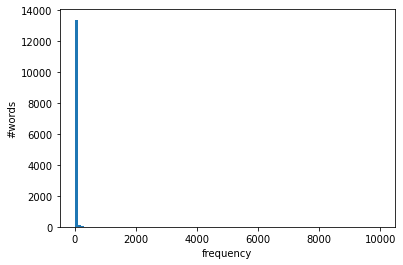

In [ ]:
#Assume lex data of 35
data = lex.values() #辞書の中の頻度データを取り出す
plt.hist(data, bins=100) #100個棒を描く
plt.xlabel('frequency')
plt.ylabel('#words')
plt.show()

##課題39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

ヒント：

xのために、順位の数字のリストを生成する。
yは、頻度の数字列。

###解答例

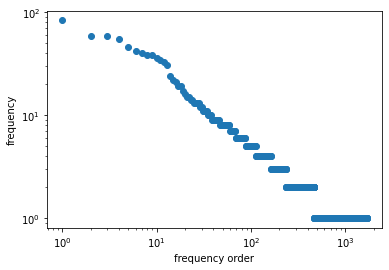

In [ ]:
ranks = [r + 1 for r in range(len(freq))]
values = [a[1] for a in freq]
plt.scatter(ranks, values)
plt.xscale('log')
........ # <- 穴埋め
plt.xlabel('frequency order')
plt.ylabel('frequency')
plt.show()